E-Commerce Delivery & Returns Analytics

Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ecom = pd.read_csv(r'C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\E-Commerce Delivery & Returns dataset\ecommerce_orders_dataset.csv')

Load and Inspect Dataset

In [4]:
print('\nPreview first rows:')
print(ecom.head(5))


Preview first rows:
   Order_ID  Customer_ID         City         Category Payment_Mode  \
0         1         4174      Seattle  Home Appliances          UPI   
1         2         4507  Los Angeles             Toys  Net Banking   
2         3         1860      Seattle           Beauty          COD   
3         4         2294      Phoenix            Books  Net Banking   
4         5         2130  Los Angeles         Clothing          UPI   

   Order_Date  Scheduled_Delivery_Days  Actual_Delivery_Days Delivery_Date  \
0  2022-10-13                        6                     6    2022-10-19   
1  2022-07-24                        6                     5    2022-07-29   
2  2022-11-24                        4                     5    2022-11-29   
3  2022-07-02                        8                     9    2022-07-11   
4  2022-01-11                        9                     7    2022-01-18   

   Order_Value  Discount_Applied  Discount_Amount  Final_Amount  Returned  \
0     

In [5]:
print('\nRows & Columns:')
print(ecom.shape)


Rows & Columns:
(12000, 15)


In [6]:
print('\nData types:')
print(ecom.info())


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order_ID                 12000 non-null  int64  
 1   Customer_ID              12000 non-null  int64  
 2   City                     12000 non-null  object 
 3   Category                 12000 non-null  object 
 4   Payment_Mode             12000 non-null  object 
 5   Order_Date               12000 non-null  object 
 6   Scheduled_Delivery_Days  12000 non-null  int64  
 7   Actual_Delivery_Days     12000 non-null  int64  
 8   Delivery_Date            12000 non-null  object 
 9   Order_Value              12000 non-null  float64
 10  Discount_Applied         12000 non-null  float64
 11  Discount_Amount          12000 non-null  float64
 12  Final_Amount             12000 non-null  float64
 13  Returned                 12000 non-null  int64  
 14  Return_Re

In [7]:
print('\nNumerical summary:')
print(ecom.describe())


Numerical summary:
          Order_ID   Customer_ID  Scheduled_Delivery_Days  \
count  12000.00000  12000.000000             12000.000000   
mean    6000.50000   3006.313667                 5.111000   
std     3464.24595   1154.224461                 2.815583   
min        1.00000   1000.000000                 1.000000   
25%     3000.75000   1996.000000                 3.000000   
50%     6000.50000   3001.000000                 5.000000   
75%     9000.25000   4006.250000                 7.000000   
max    12000.00000   4999.000000                11.000000   

       Actual_Delivery_Days   Order_Value  Discount_Applied  Discount_Amount  \
count          12000.000000  12000.000000      12000.000000     12000.000000   
mean               4.995000    259.896366          0.149474        38.783751   
std                2.602218    138.452072          0.086722        32.688647   
min                1.000000     20.050000          0.000000         0.000000   
25%                3.000000   

In [8]:
print('\nUnique values per column:')
print(ecom.nunique())


Unique values per column:
Order_ID                   12000
Customer_ID                 3790
City                          10
Category                       7
Payment_Mode                   5
Order_Date                   365
Scheduled_Delivery_Days       11
Actual_Delivery_Days           9
Delivery_Date                373
Order_Value                10597
Discount_Applied              31
Discount_Amount             6726
Final_Amount               10484
Returned                       2
Return_Reason                  5
dtype: int64


Data Cleaning & Preprocessing

In [10]:
print('\nMissing Values Per Columns:')
print(ecom.isnull().sum())


Missing Values Per Columns:
Order_ID                       0
Customer_ID                    0
City                           0
Category                       0
Payment_Mode                   0
Order_Date                     0
Scheduled_Delivery_Days        0
Actual_Delivery_Days           0
Delivery_Date                  0
Order_Value                    0
Discount_Applied               0
Discount_Amount                0
Final_Amount                   0
Returned                       0
Return_Reason              10217
dtype: int64


In [11]:
print('\nDuplicates:')
print(ecom.duplicated().sum())


Duplicates:
0


In [12]:
ecom['Order_Date'] = pd.to_datetime(ecom['Order_Date'])
ecom['Delivery_Date'] = pd.to_datetime(ecom['Delivery_Date'])

In [13]:
print('\nUnique values for categorical columns:')
for c in ['City','Category','Payment_Mode','Return_Reason']:
    print('Column Name:',c, ecom[c].unique())


Unique values for categorical columns:
Column Name: City ['Seattle' 'Los Angeles' 'Phoenix' 'Boston' 'San Francisco' 'Dallas'
 'Chicago' 'Miami' 'Houston' 'New York']
Column Name: Category ['Home Appliances' 'Toys' 'Beauty' 'Books' 'Clothing' 'Electronics'
 'Sports']
Column Name: Payment_Mode ['UPI' 'Net Banking' 'COD' 'Debit Card' 'Credit Card']
Column Name: Return_Reason ['Size Issue' nan 'Wrong Item' 'Late Delivery' 'Defective'
 'No Longer Needed']


In [14]:
print('Filled Nulls Rows')

Filled Nulls Rows


In [15]:
ecom['Return_Reason'] = ecom['Return_Reason'].fillna('Not Returned')

Exploratory Data Analysis

In [17]:
total_revenue = ecom['Final_Amount'].sum()
print(f'Total Revenue:\n {total_revenue}')

Total Revenue:
 2653351.38


In [20]:
avg_order_value = ecom['Final_Amount'].mean()
print(f'Average Order:\n {avg_order_value}')

Average Order:
 221.11261499999998


In [26]:
return_rate = ecom['Returned'].mean() * 100
print(f'Return Rate:\n {return_rate}')

Return Rate:
 14.858333333333334


In [33]:
top_cities = ecom.groupby('City')['Final_Amount'].sum().sort_values(ascending=False).head(5)
print(f'Top 5 Cities by Revenue:\n {top_cities}')

Top 5 Cities by Revenue:
 City
New York       272776.63
Chicago        268318.23
Los Angeles    268230.50
Seattle        268148.82
Dallas         268089.88
Name: Final_Amount, dtype: float64


In [36]:
top_categories = ecom['Category'].value_counts().head(5)
print(f'Most Sold Categories:\n {top_categories}')

Most Sold Categories:
 Category
Books          1791
Sports         1778
Toys           1727
Beauty         1691
Electronics    1684
Name: count, dtype: int64


In [38]:
top_customers = ecom.groupby('Customer_ID')['Final_Amount'].sum().sort_values(ascending=False).head(5)
print(f'Top 5 Customers by spend:\n {top_customers}')

Top 5 Customers by spend:
 Customer_ID
1719    2534.29
3068    2528.90
2855    2501.01
1018    2456.55
3532    2367.41
Name: Final_Amount, dtype: float64


In [41]:
payment_pref = ecom['Payment_Mode'].value_counts()
print(f'Payment Mode Preferences:\n {payment_pref}')

Payment Mode Preferences:
 Payment_Mode
COD            2427
UPI            2426
Net Banking    2422
Debit Card     2380
Credit Card    2345
Name: count, dtype: int64


In [44]:
monthly_revenue = ecom.groupby(ecom['Order_Date'].dt.to_period('M'))['Final_Amount'].sum()
print(f'Revenue by Month:\n {monthly_revenue}')

Revenue by Month:
 Order_Date
2022-01    216743.25
2022-02    204905.86
2022-03    222852.71
2022-04    212223.71
2022-05    228985.68
2022-06    225845.32
2022-07    232296.58
2022-08    222931.75
2022-09    229354.65
2022-10    214271.36
2022-11    215164.12
2022-12    227776.39
Freq: M, Name: Final_Amount, dtype: float64


In [46]:
ecom['Delay'] = ecom['Actual_Delivery_Days'] - ecom['Scheduled_Delivery_Days']
late_delivery_rate = (ecom['Delay'] > 0).mean() * 100
print(f'Late Delivery Rate: {late_delivery_rate:.2f}%')

print('\n')

avg_delay_category = ecom.groupby('Category')['Delay'].mean().sort_values(ascending=False)
print(f'Avg Delivery Delay by Category:\n {avg_delay_category}')

Late Delivery Rate: 34.83%


Avg Delivery Delay by Category:
 Category
Electronics       -0.057601
Beauty            -0.086339
Home Appliances   -0.089480
Toys              -0.102490
Clothing          -0.148060
Books             -0.151870
Sports            -0.170979
Name: Delay, dtype: float64


In [48]:
return_rate_cat = ecom.groupby('Category')['Returned'].mean().sort_values(ascending=False) * 100
print(f'Return % by Category:\n {return_rate_cat}')

print('\n')

valid_returns = ecom[ecom['Return_Reason'] != "Not Returned"]

return_reasons = valid_returns['Return_Reason'].value_counts().head(5)
print(f'Top Return Reasons:\n {return_reasons}')

Return % by Category:
 Category
Toys               15.576144
Books              15.298716
Beauty             15.198108
Clothing           14.805970
Electronics        14.786223
Sports             14.510686
Home Appliances    13.784764
Name: Returned, dtype: float64


Top Return Reasons:
 Return_Reason
No Longer Needed    386
Wrong Item          369
Size Issue          367
Defective           346
Late Delivery       315
Name: count, dtype: int64


Visualization

Top 5 Cities by Revenue

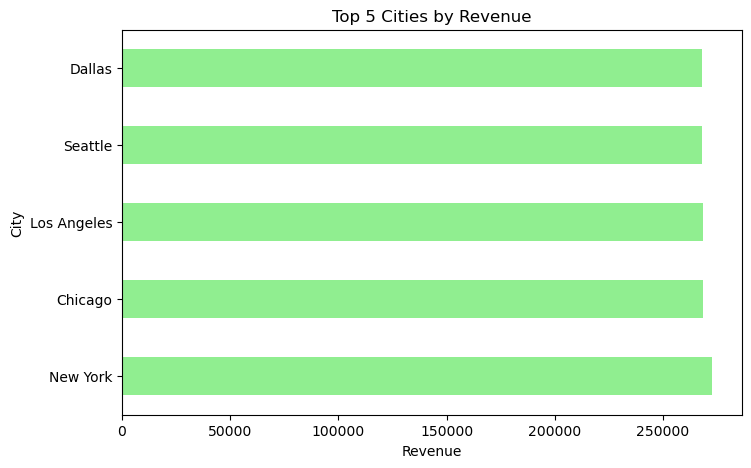

In [52]:
#Top 5 Cities by Revenue
plt.figure(figsize=(8,5))
top_cities.plot(kind='barh', color='lightgreen')
plt.title("Top 5 Cities by Revenue")
plt.xlabel("Revenue")
plt.ylabel("City")
plt.show()

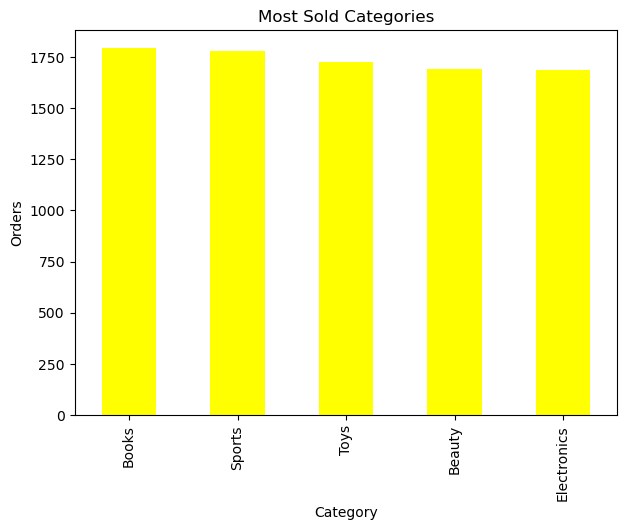

In [53]:
#Most Sold Categories
plt.figure(figsize=(7,5))
top_categories.plot(kind='bar', color='yellow')
plt.title("Most Sold Categories")
plt.xlabel("Category")
plt.ylabel("Orders")
plt.show()

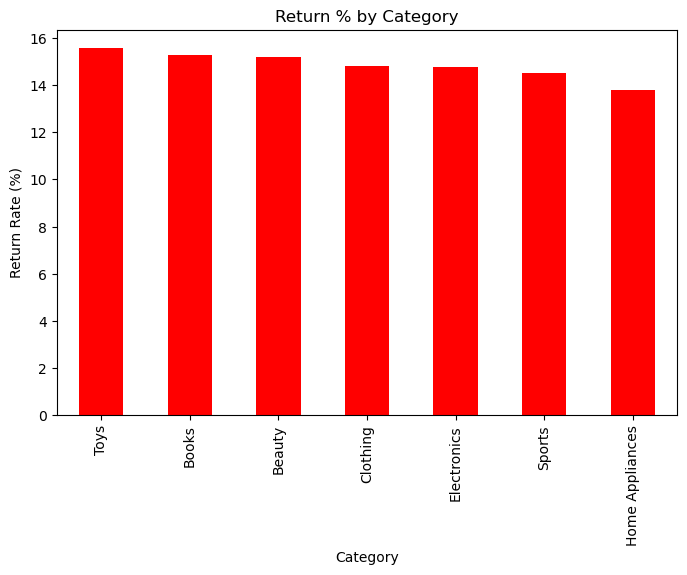

In [55]:
#Return % by Category
plt.figure(figsize=(8,5))
return_rate_cat.plot(kind='bar', color='red')
plt.title("Return % by Category")
plt.ylabel("Return Rate (%)")
plt.show()

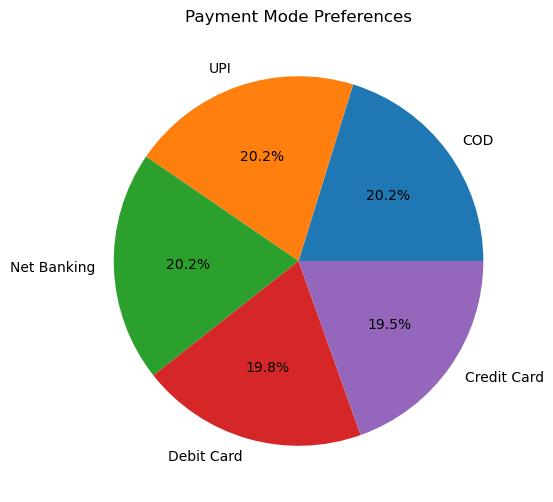

In [56]:
#Payment Mode Preferences
plt.figure(figsize=(6,6))
payment_pref.plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Mode Preferences")
plt.ylabel("")
plt.show()

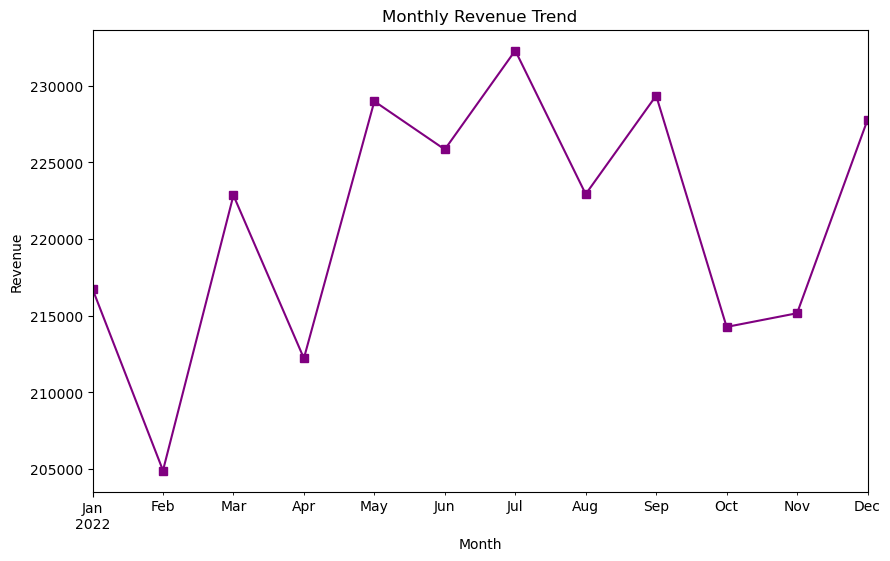

In [58]:
#Monthly Revenue Trend
plt.figure(figsize=(10,6))
monthly_revenue.plot(kind='line', marker='s', color='purple')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

In [60]:
ecom.to_csv(r'C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\E-Commerce Delivery & Returns dataset\ecommerce_cleaned.csv', index=False)